# Stereographic Visualization of 5-Dimensional Regular Polytopes
(https://www.mdpi.com/2073-8994/11/3/391#FD7-symmetry-11-00391)

## First tests for visualization

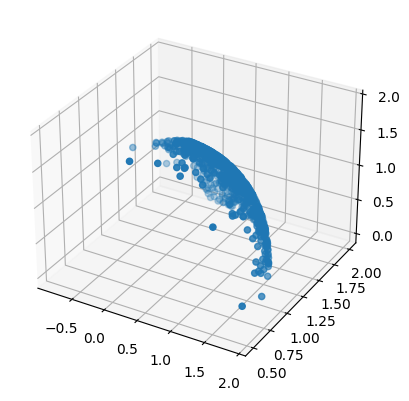

In [2]:
# first try
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
r3 = 2
N = 1000

# Define the function for rho
def rho(i, j, k, l, m):
    return np.sqrt(i**2 + j**2 + k**2 + l**2 + m**2)

# Define the function for theta
def theta(i, j, k, l, m):
    return np.arccos(m/rho(i, j, k, l, m))

# Generate random 5D points
points = np.random.rand(N, 5)

# Calculate rho and theta for each point
rho_values = np.array([rho(*p) for p in points])
theta_values = np.array([theta(*p) for p in points])

# Calculate x, y, z coordinates
x = r3 * np.sin(theta_values) * np.cos(rho_values)
y = r3 * np.sin(theta_values) * np.sin(rho_values)
z = r3 * np.cos(theta_values)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()

## Implementation of the Fundemental Region Algorithm (FRA) according to Wang et al.

In [ ]:
def fundamental_region_algorithm(x_0, fundamental_root_system):
    '''
    Implementation of the Fundemental Region Algorithm for stereographic projection (Want et al., 2019).

            Parameters:
                    x_0 (list): input vector
                    fundamental_root_system (list): list of the normal vectors of the fundamental region.

            Returns:
                    x_n: reflected point, that is element of the fundamental region
                    n: reflection number
    '''
    # define reflection number n and sign
    n = 0
    sign = 0
    # list of points and reflections 
    list_of_points = [x_0]

    # compute sign for relation between x_0 and v_k
    for v_k in fundamental_root_system:
        if np.dot(x_0,v_k) > 0 :
            sign += 1
    
    while sign < 5:
        n += 1
        for v_k in fundamental_root_system:
            if np.dot(list_of_points[n-1], v_k) < 0:
                # stereographic projection
                x_n = (np.array(list_of_points[n-1]) - 2 * np.dot(list_of_points[n-1], v_k) / np.dot(v_k, v_k) * np.array(v_k)).tolist()
            
            # compute sign for elation between x_n and v_i
            sign = 0
            for v_i in fundamental_root_system:
                if np.dot(x_n, v_i) > 0:
                    sign += 1
            
            # break while loop (but why?)
            list_of_points.append(x_n)
            break

    return x_n, n